In [92]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [93]:
x_train, y_train = load_data()

In [94]:
# print(f"x_train={x_train},shape={x_train.shape}")
# print(f"x_train={y_train},shape={y_train.shape}")
print(f"x中前五个数据：{x_train[:5]}")
print(f"y中前五个数据：{y_train[:5]}")

x中前五个数据：[6.1101 5.5277 8.5186 7.0032 5.8598]
y中前五个数据：[17.592   9.1302 13.662  11.854   6.8233]


Text(0.5, 1.0, 'Profits vs Population per city')

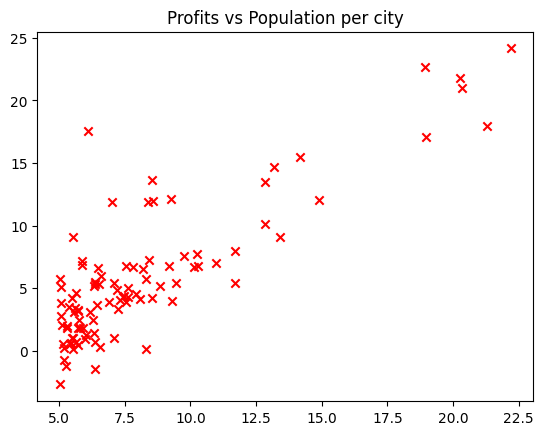

In [95]:
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Profits vs Population per city")

In [96]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_w_b = w * x[i] + b
        total_cost += ((f_w_b - y[i]) ** 2)
    total_cost /= (2 * m)
    return total_cost

In [97]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *

compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


In [98]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b

        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_db /= m
    dj_dw /= m

    return dj_dw, dj_db

In [99]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


In [100]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


In [101]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w -= (alpha * dj_dw)
        b -= (alpha * dj_db)

        if i < 100000:
            cost = cost_function(x, y, w, b)
            J_history.append(cost)

        if i % math.ceil(num_iters / 10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4},Cost:{float(J_history[-1]):8.2f}    ")

    return w, b, J_history, w_history



In [102]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w, b, J_hist, w_hist = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha,
                                        iterations)
print("w,b found by gradient descent:", w, b)


Iteration    0,Cost:    6.74    
Iteration  150,Cost:    5.31    
Iteration  300,Cost:    4.96    
Iteration  450,Cost:    4.76    
Iteration  600,Cost:    4.64    
Iteration  750,Cost:    4.57    
Iteration  900,Cost:    4.53    
Iteration 1050,Cost:    4.51    
Iteration 1200,Cost:    4.50    
Iteration 1350,Cost:    4.49    
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


In [103]:
m=x_train.shape[0]
y_pre=np.zeros(m)

for i in range(m):
    y_pre[i]=w*x_train[i]+b



Text(0.5, 0, '人口 单位：万人')

C:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 22478 (\N{CJK UNIFIED IDEOGRAPH-57CE}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\envs\wed\lib\site-packages\IPython\

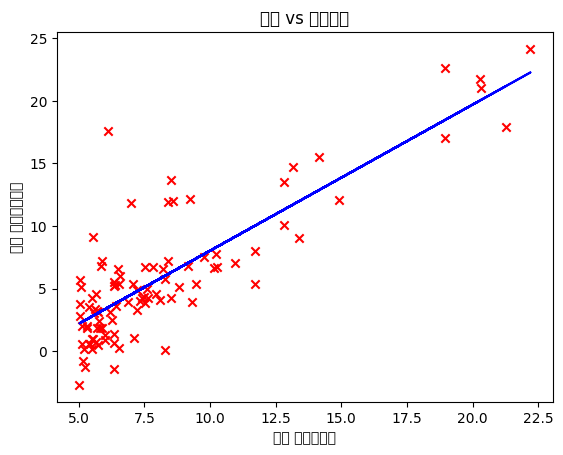

In [104]:
plt.plot(x_train,y_pre,c='b')
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title("利益 vs 城市人口")
plt.ylabel('收益 单位：万美元')
plt.xlabel('人口 单位：万人')

In [105]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
